In [1]:
import osmnx as ox
from geopy.distance import distance
import networkx as nx

Carga el mapa de Bogotá y lo define como un mapa de calles

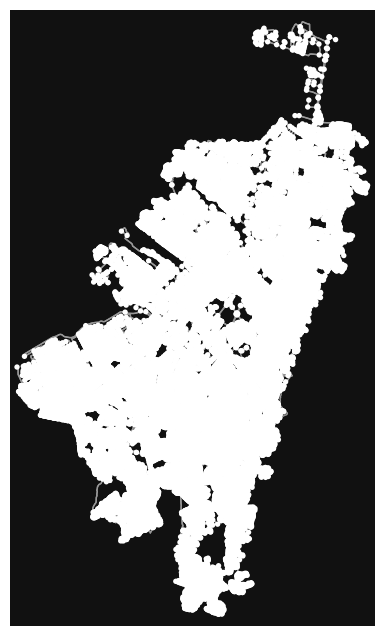

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [2]:

place = 'Bogotá, Colombia'
network_type = 'drive'
G = ox.graph_from_place(place,network_type=network_type)
G_projected = ox.project_graph(G)
ox.plot_graph(G)



Define el punto de origen y de destino

In [3]:
start_point = (-74.08900434582466,4.6215739337981105)  # Punto inicio longitud, latitud Banco de Alimentos
end_point = (-74.0422, 4.7032)  # Punto final longitud, latitud Unicentro


Halla los puntos en el grafo más cercanos tanto al punto de origen como al de destino

In [4]:
try:
    start_node = ox.distance.nearest_nodes(G, X=start_point[0], Y=start_point[1], return_dist=False)
    end_node = ox.distance.nearest_nodes(G, X=end_point[0], Y=end_point[1], return_dist=False)

except Exception as e:
        print('No se encuentra el punto de origen o destino')


Calcula la ruta más corta y la dibuja en el mapa

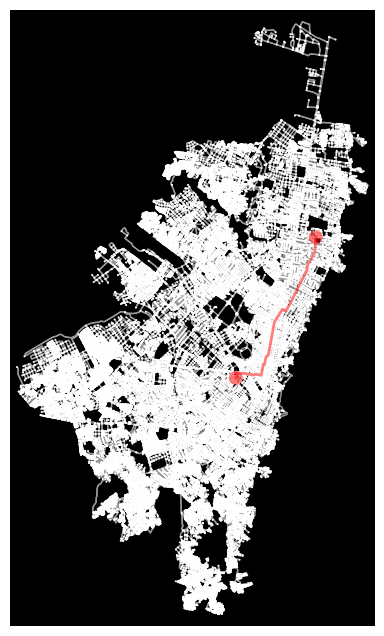

La distancia es : 12.27 Kms


In [5]:
try:
    #Calcula la ruta y la dibuja. Este paso es opcional
    route = ox.shortest_path(G, start_node, end_node, weight='length')
    fig, ax = ox.plot_graph_route(G, route, route_linewidth=2, node_size=2, bgcolor='k')

    #Calcula la distancia más corta entre el nodo de inicio y el nodo final.
    shortest_route_length = nx.shortest_path_length(G, start_node, end_node, weight='length')
    print (f'La distancia es : {shortest_route_length/1000:.2f} Kms')
except Exception as e:
        print('No se pudo calcular la ruta')

In [ ]:
for i in puntos:
    for j in puntos:
        try: 
            start_node = ox.distance.nearest_nodes(G, X=i[0], Y=i[1], return_dist=False)
            end_node = ox.distance.nearest_nodes(G, X=j[0], Y=j[1], return_dist=False)
            d[i,j] = nx.shortest_path_length(G, start_node, end_node, weight='length')
            print (f'La distancia es : {shortest_route_length/1000:.2f} Kms')
        except Exception as e:
            d[i,j]= 10000000

df =pd.DataFrame(d)
#pasar a Excel